Notebook to show forecast of plume for Sam Kastner

In [39]:
import matplotlib.pyplot as plt
import netCDF4 as nc
import numpy as np

from salishsea_tools import (
    nc_tools,
    viz_tools,
)
%matplotlib inline

In [40]:
tracers = nc.Dataset('/results/SalishSea/forecast/13jan16/SalishSea_1h_20160114_20160115_grid_T.nc')
jmin = 210; jmax=370
imin = 340; imax=520
surface_salinity = tracers.variables['vosaline'][:,0,imin:imax,jmin:jmax]
lons = tracers.variables['nav_lon']
lats = tracers.variables['nav_lat']
print (surface_salinity.shape)

(30, 180, 160)


In [45]:
def plot_surface_salinity(t, surface_salinity):
    
    sal_masked = np.ma.masked_values(surface_salinity, 0)

    fig, ax = plt.subplots(1, 1, figsize=(10, 8))
    aspect = viz_tools.set_aspect(ax, coords='map', lats=lats)
    cmap = plt.get_cmap('ocean')
    cmap.set_bad('burlywood')
    mesh = ax.pcolormesh(lons[imin:imax,jmin:jmax], lats[imin:imax,jmin:jmax], 
                     sal_masked, cmap=cmap)
    cbar = fig.colorbar(mesh)
    plt.axis((-123.8, -122.9, 48.8, 49.4))
    plt.title("Surface Salinity, Jan 14 at " + str(t) + ":00 hours UTC")

# Add axis labels
    ax.set_xlabel('{longitude.long_name} [{longitude.units}]'.format(longitude=lons))
    ax.set_ylabel('{latitude.long_name} [{latitude.units}]'.format(latitude=lats))
    cbar.set_label('Practical Salinity')



/home/sallen/anaconda/envs/numeric/lib/python3.4/site-packages/matplotlib/pyplot.py:424: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


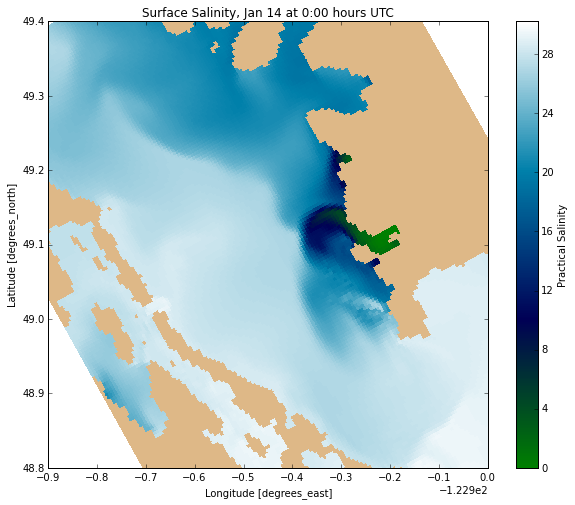

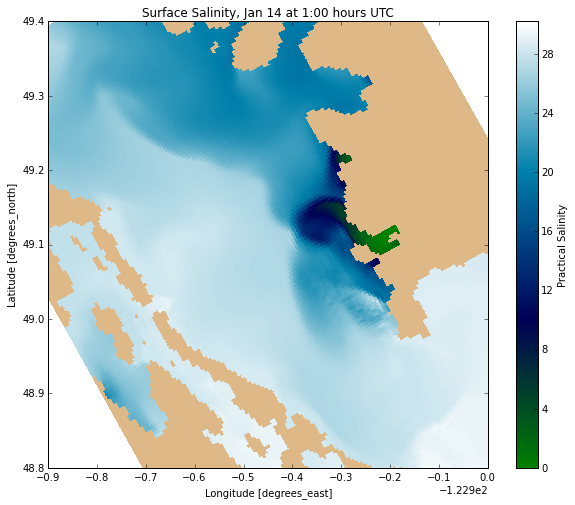

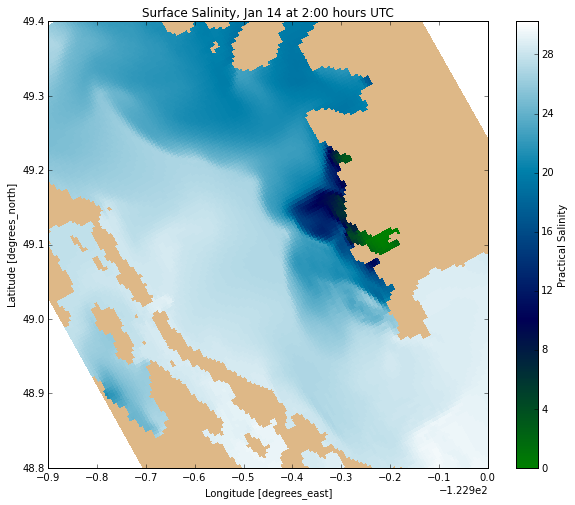

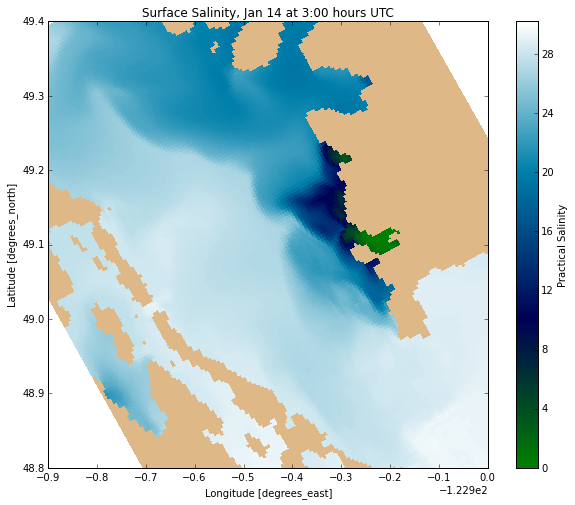

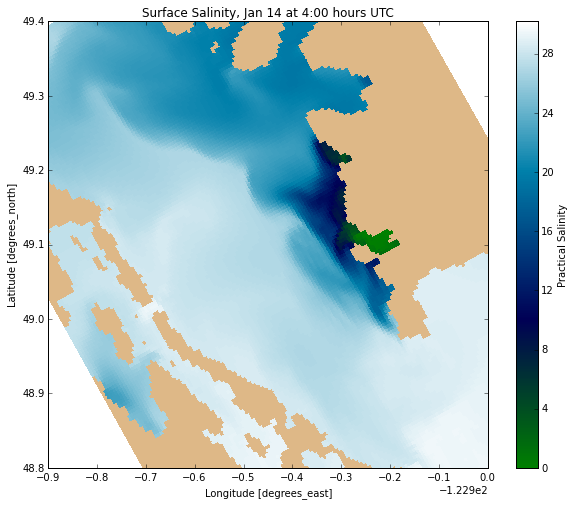

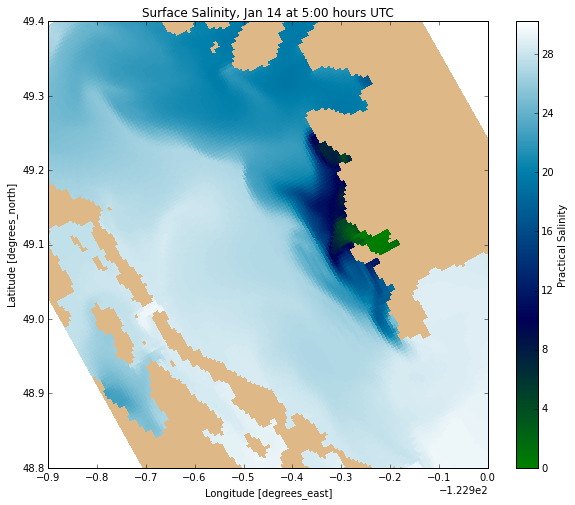

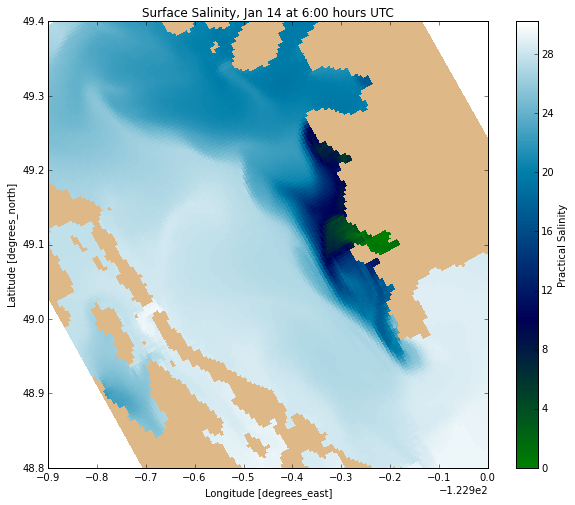

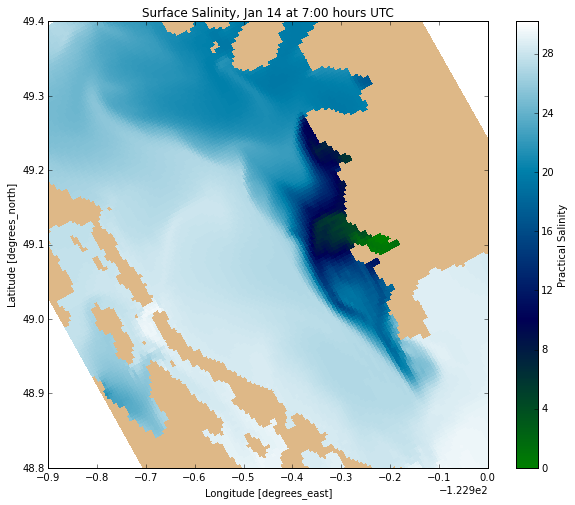

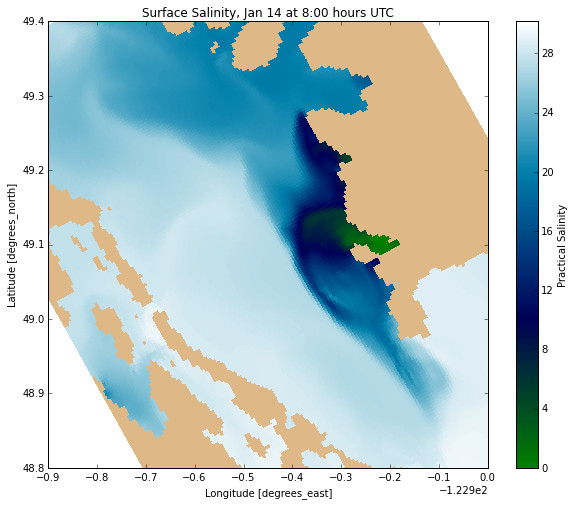

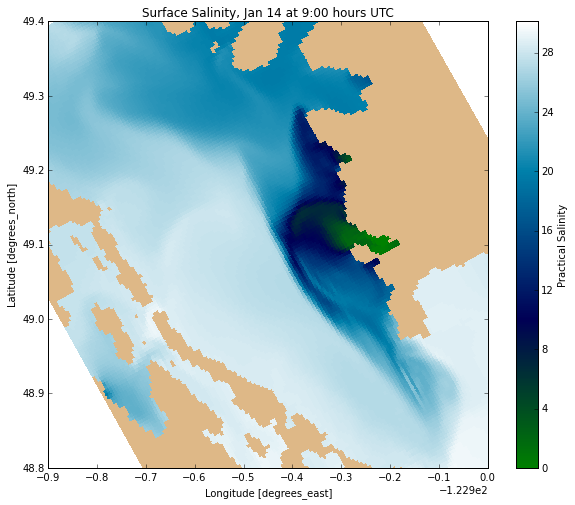

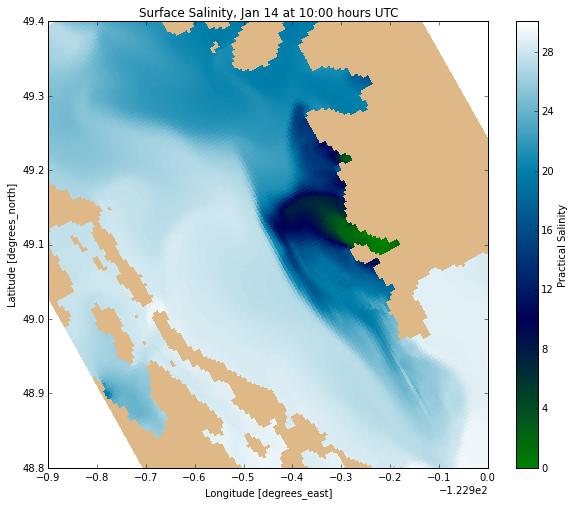

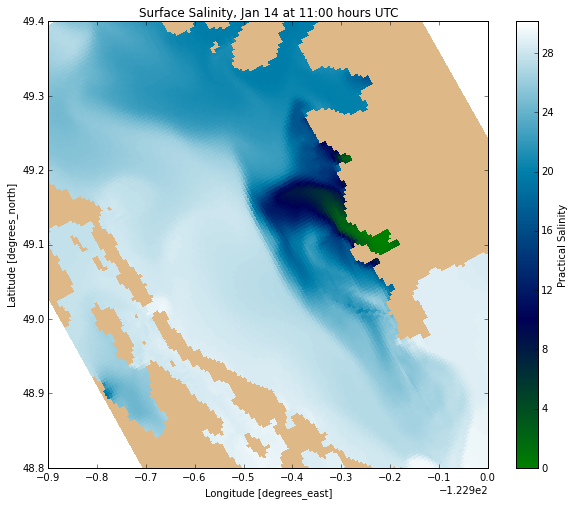

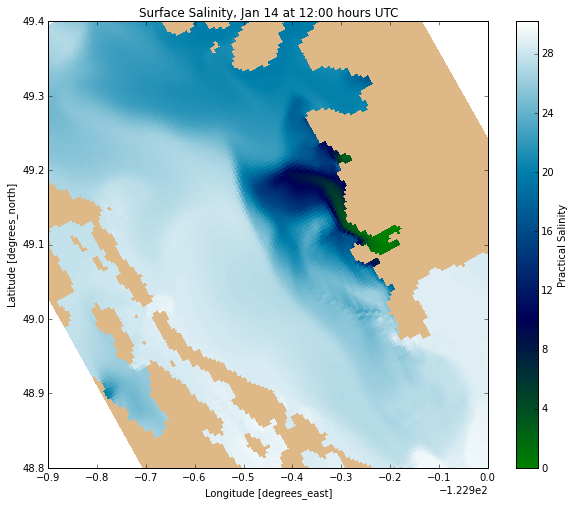

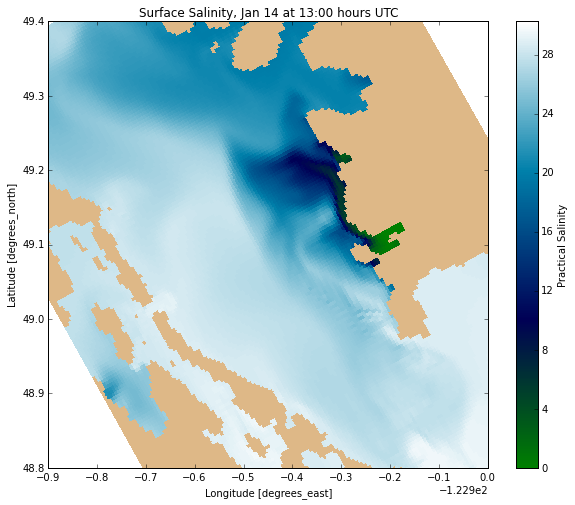

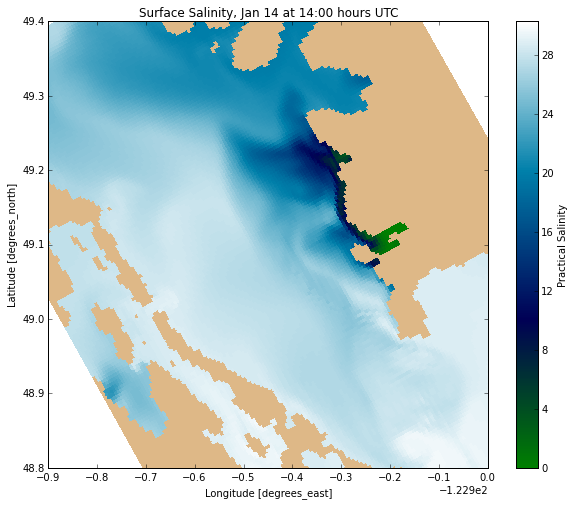

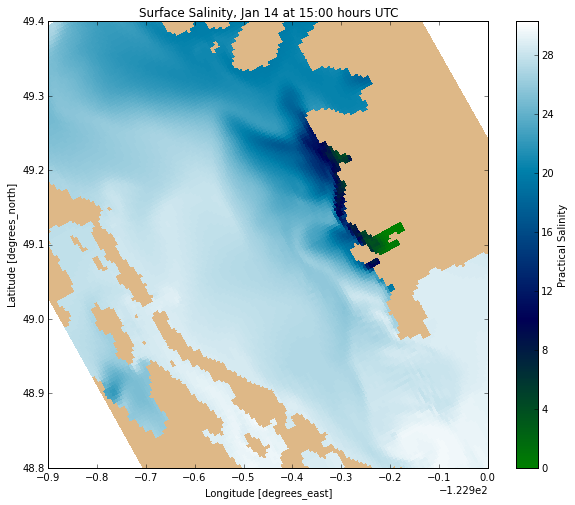

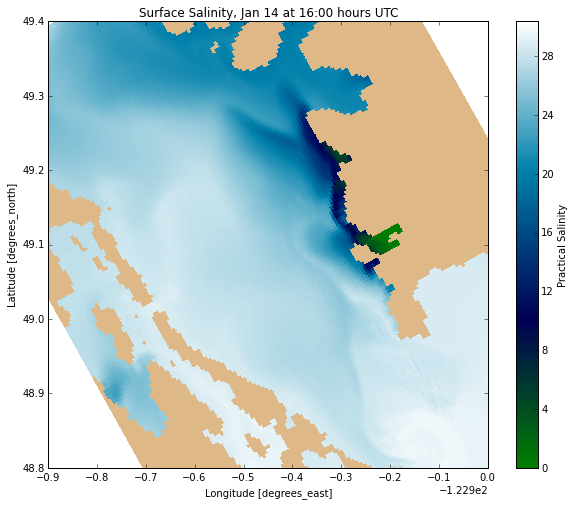

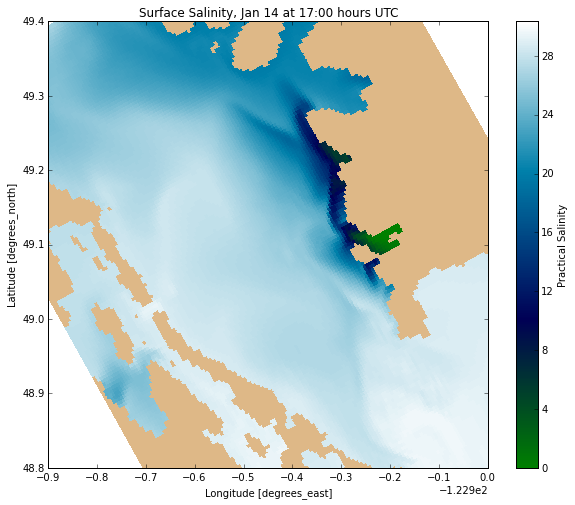

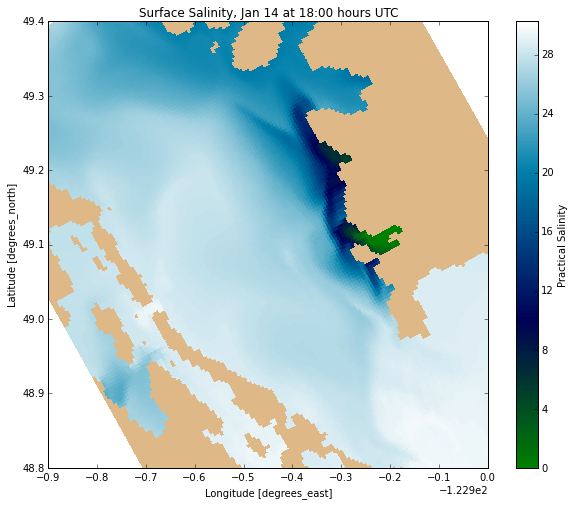

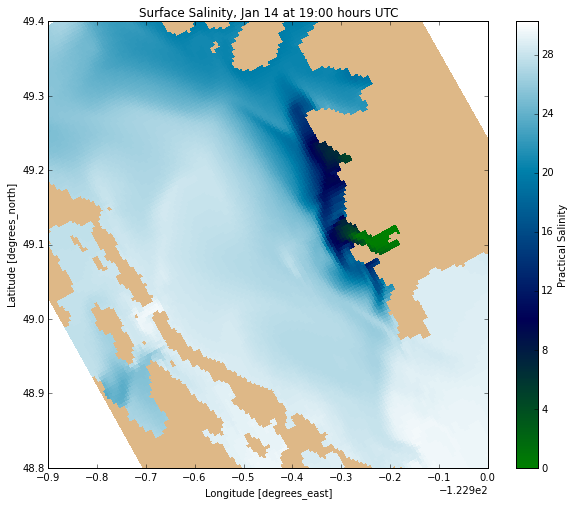

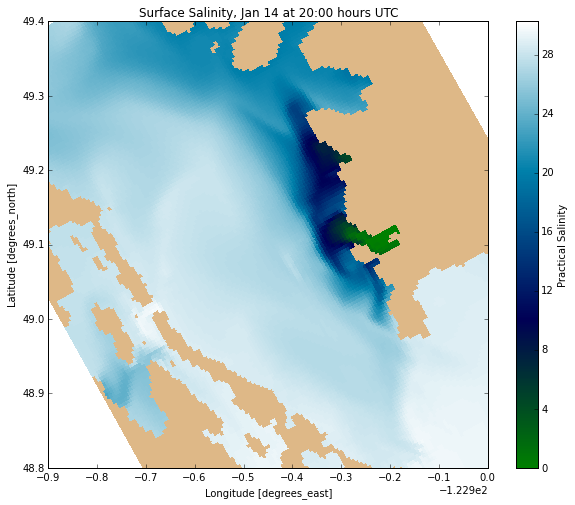

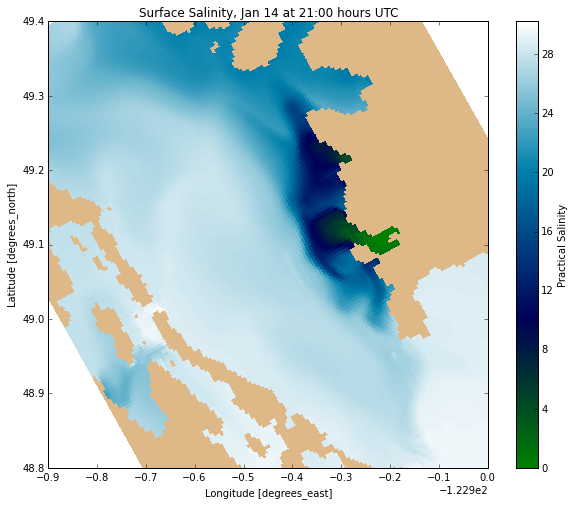

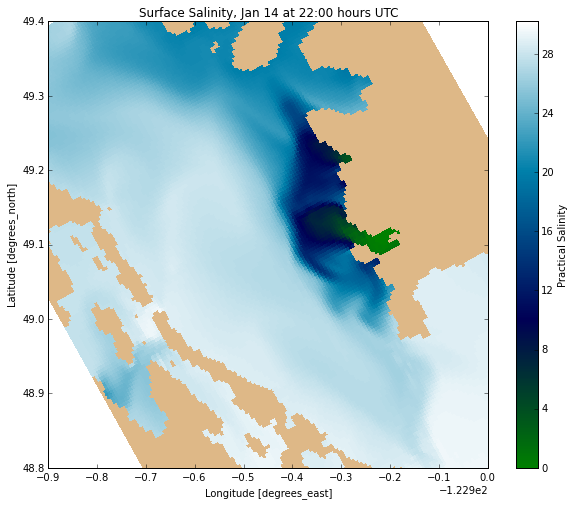

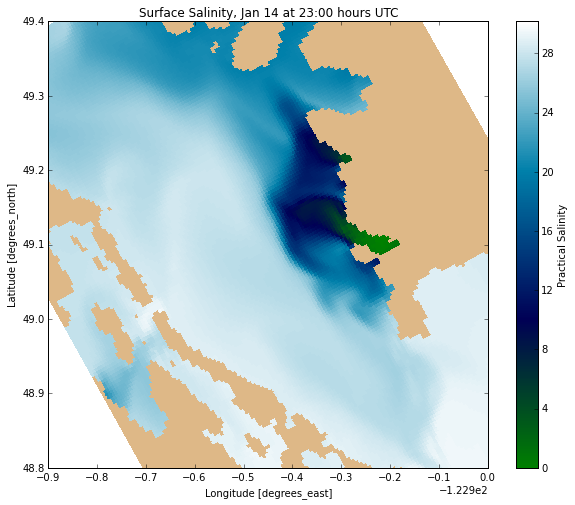

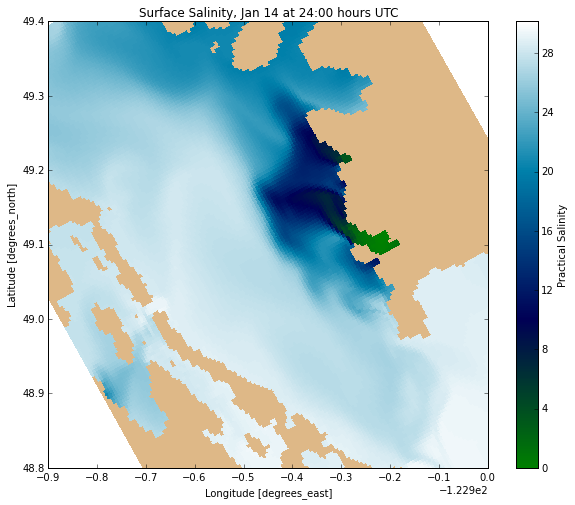

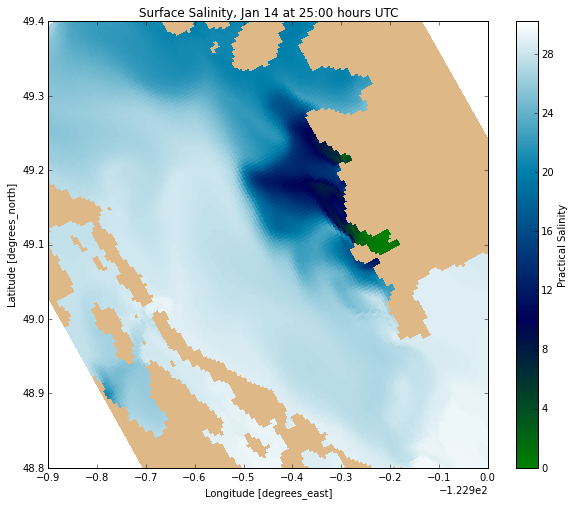

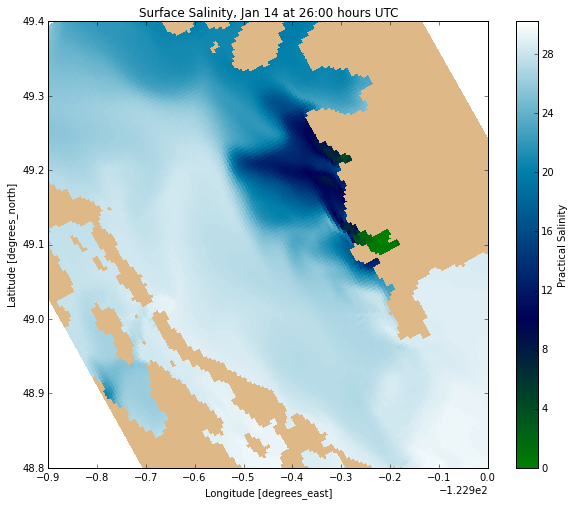

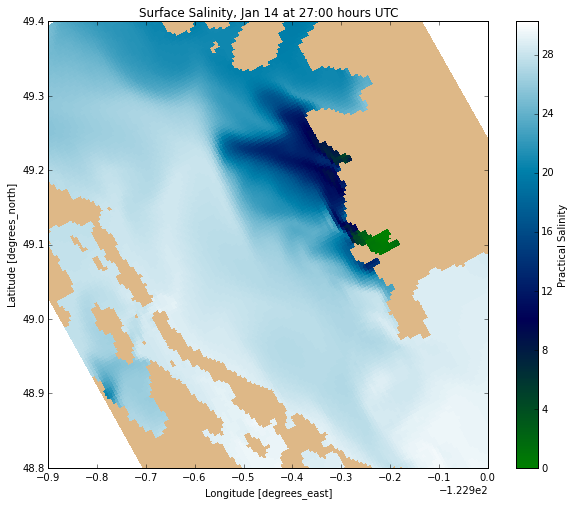

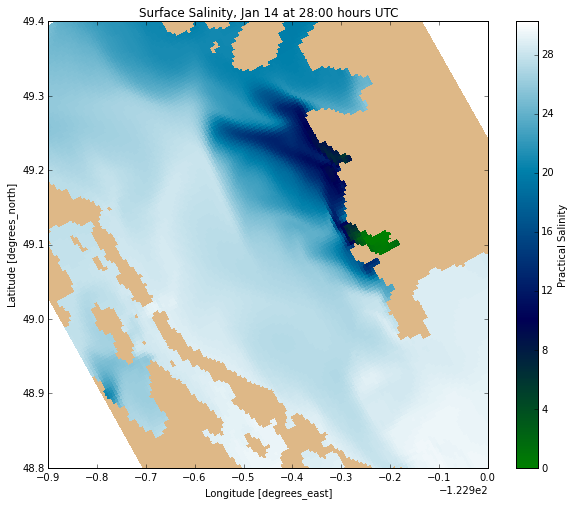

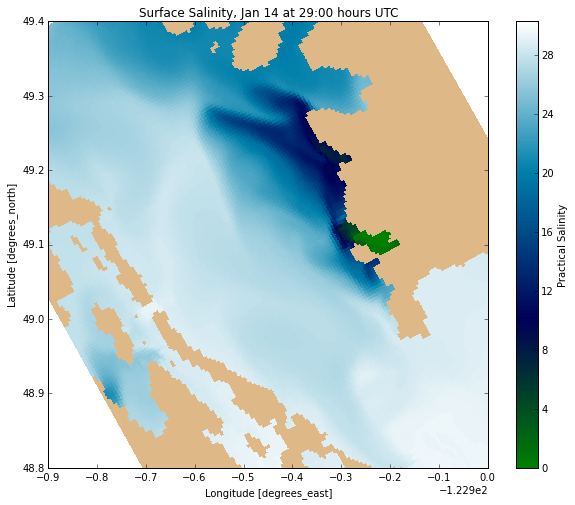

In [46]:
for t in range(surface_salinity.shape[0]):
    plot_surface_salinity(t, surface_salinity[t])